# Exploring Dandiset 000945: Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation

> **⚠️ CAUTION: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results.**

## Overview

This notebook explores Dandiset 000945, which contains neural spiking data from the somatosensory cortex of awake head-fixed rats in response to transcranial focused ultrasound (tFUS) stimulation. The data was collected using 32-channel NeuroNexus electrodes chronically implanted in the rat brain. 

The experiments tested different pulse repetition frequencies (PRFs) of ultrasound stimulation, including 30 Hz, 300 Hz, 1500 Hz, 3000 Hz, and 4500 Hz. Each recording consists of 500 trials, with ultrasound stimulation delivered approximately every 2.5 seconds with a 10% jitter. Each stimulus had a 200 microsecond pulse duration and a 67 ms ultrasound duration.

You can view this dataset on Neurosift: [https://neurosift.app/dandiset/000945](https://neurosift.app/dandiset/000945)

## Required Packages

We'll use the following packages to explore and analyze the data in this notebook:

In [1]:
import pynwb
import h5py
import remfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from datetime import datetime

# Configure seaborn styling for better visualizations
sns.set_theme()

## Loading Data from DANDI Archive

The DANDI Archive hosts datasets in Neurodata Without Borders (NWB) format. We'll use the DANDI API to access the data. First, let's connect to the archive and examine what files are available.

In [2]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000945")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 75 assets in the dataset

First 5 assets:
- sub-BH498/sub-BH498_ses-20240306T124227_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T200606_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T191833_ecephys.nwb
- sub-BH498/sub-BH498_ses-20230906T180913_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T204552_ecephys.nwb


### Understanding the Dandiset Structure

The Dandiset contains NWB files organized by subject. Each subject has multiple recording sessions with different PRFs (pulse repetition frequencies). The naming convention indicates both the subject ID and the experiment parameters.

In [3]:
# Let's look at how many unique subjects are in the dataset
subject_ids = set(asset.path.split('/')[0] for asset in assets)
print(f"Number of unique subjects: {len(subject_ids)}")
print("Subject IDs:")
for subject in sorted(subject_ids):
    print(f"- {subject}")

Number of unique subjects: 10
Subject IDs:
- sub-BH497
- sub-BH498
- sub-BH506
- sub-BH508
- sub-BH512
- sub-BH514
- sub-BH519
- sub-BH521
- sub-BH526
- sub-BH527


## Loading and Exploring an NWB File

Let's select and load one of the NWB files to explore its structure and contents. We'll use a file from subject BH526 with a PRF of 1500 Hz.

In [4]:
# Define the asset ID for the file we want to load
asset_id = "b88188c8-4e4c-494c-8dab-806b1efd55eb"  # BH526 with 1500 Hz PRF
asset_url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"

# Load the NWB file
remote_file = remfile.File(asset_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Display basic information about the file
print(f"Session Description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")

Session Description: Awake S1 Stimulation by tFUS
Identifier: BH526_1500_200
Session Start Time: 2023-10-29 17:24:56-04:00
Institution: Carnegie Mellon University


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### Subject Information

Let's examine the information about the subject from which the data was recorded.

In [5]:
# Print subject information
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Age: {nwb.subject.age}")
print(f"Sex: {nwb.subject.sex}")
print(f"Species: {nwb.subject.species}")
print(f"Description: {nwb.subject.description}")

Subject ID: BH526
Age: P24W
Sex: M
Species: Rattus norvegicus
Description: HSD:WI rat


### Electrode Information

The data was recorded using a 32-channel electrode array. Let's examine the electrode configuration.

In [6]:
# Get information about electrodes
electrodes_df = nwb.electrodes.to_dataframe()
print(f"Number of electrodes: {len(electrodes_df)}")
print("\nElectrode columns:")
print(electrodes_df.columns.tolist())
print("\nFirst 5 electrodes:")
print(electrodes_df.head())

Number of electrodes: 32

Electrode columns:
['x', 'y', 'z', 'imp', 'location', 'filtering', 'group', 'group_name']

First 5 electrodes:
      x     y    z  imp location filtering  \
id                                           
0   1.0  10.0  0.0  NaN  unknown   unknown   
1   1.0  11.0  0.0  NaN  unknown   unknown   
2   1.0   9.0  0.0  NaN  unknown   unknown   
3   1.0   8.0  0.0  NaN  unknown   unknown   
4   1.0   7.0  0.0  NaN  unknown   unknown   

                                                group   group_name  
id                                                                  
0   shank1 pynwb.ecephys.ElectrodeGroup at 0x13988...  shank1elec1  
1   shank1 pynwb.ecephys.ElectrodeGroup at 0x13988...  shank1elec2  
2   shank1 pynwb.ecephys.ElectrodeGroup at 0x13988...  shank1elec3  
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x13988...  shank1elec4  
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x13988...  shank1elec5  


### Trial Information

Each recording session consists of multiple trials where ultrasound stimulation was applied. Let's examine the trial structure.

In [7]:
# Get information about trials
trials_df = nwb.trials.to_dataframe()
print(f"Number of trials: {len(trials_df)}")
print("\nFirst 5 trials:")
print(trials_df.head())

# Calculate trial durations and inter-trial intervals
trial_durations = trials_df['stop_time'] - trials_df['start_time']
inter_trial_intervals = trials_df['start_time'].iloc[1:].reset_index(drop=True) - trials_df['stop_time'].iloc[:-1].reset_index(drop=True)

print(f"\nAverage trial duration: {np.mean(trial_durations):.6f} seconds")
print(f"Min trial duration: {np.min(trial_durations):.6f} seconds")
print(f"Max trial duration: {np.max(trial_durations):.6f} seconds")
print(f"Average inter-trial interval: {np.mean(inter_trial_intervals):.6f} seconds")
print(f"Min inter-trial interval: {np.min(inter_trial_intervals):.6f} seconds")
print(f"Max inter-trial interval: {np.max(inter_trial_intervals):.6f} seconds")

Number of trials: 500

First 5 trials:
    start_time  stop_time
id                       
1     0.358728   2.558728
2     2.738217   4.938217
3     5.190861   7.390861
4     7.558799   9.758799
5    10.031964  12.231964

Average trial duration: 2.200000 seconds
Min trial duration: 2.200000 seconds
Max trial duration: 2.200000 seconds
Average inter-trial interval: 0.294988 seconds
Min inter-trial interval: 0.053332 seconds
Max inter-trial interval: 0.549440 seconds


Let's visualize the trial structure by plotting the trial start times and the distribution of inter-trial intervals.

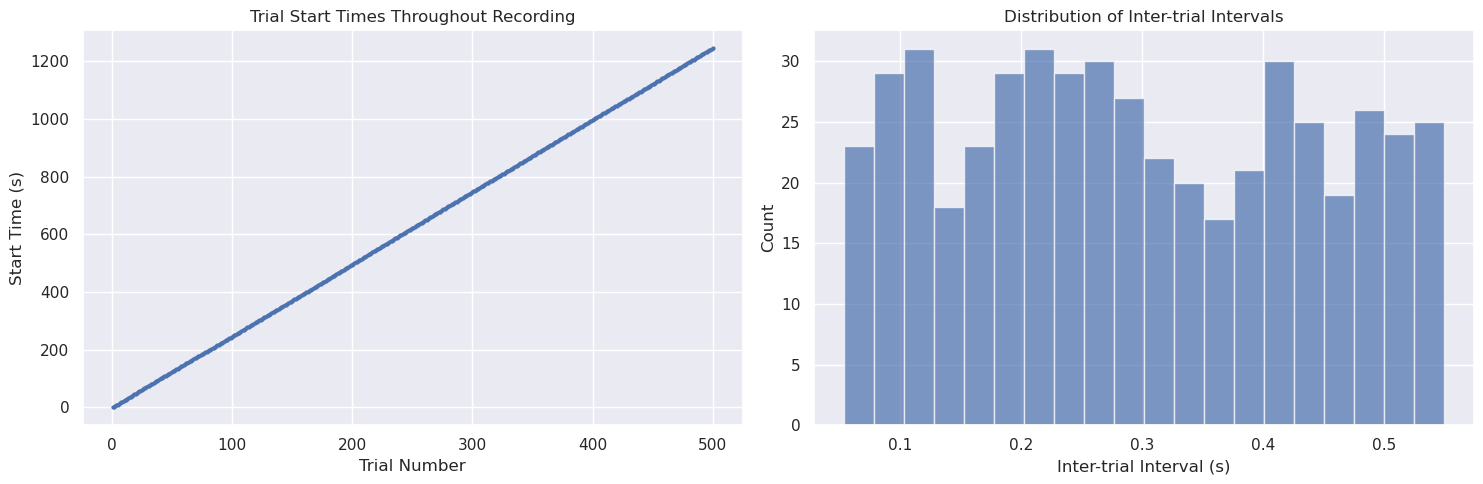

In [8]:
# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the trial start times
ax1.plot(trials_df.index, trials_df['start_time'], 'o-', markersize=2)
ax1.set_xlabel('Trial Number')
ax1.set_ylabel('Start Time (s)')
ax1.set_title('Trial Start Times Throughout Recording')
ax1.grid(True)

# Plot histogram of inter-trial intervals
ax2.hist(inter_trial_intervals, bins=20, alpha=0.7)
ax2.set_xlabel('Inter-trial Interval (s)')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Inter-trial Intervals')
ax2.grid(True)

plt.tight_layout()
plt.show()

### Units (Neurons) Information

The NWB file contains information about spiking activity of individual neurons (units). Let's examine the unit properties and their classification.

In [9]:
# Get information about units
units_df = nwb.units.to_dataframe()
print(f"Number of units: {len(units_df)}")
print(f"Units columns: {list(units_df.columns)}")
print("\nFirst 5 units:")
print(units_df.head())

# Count cell types
if 'celltype_label' in units_df.columns:
    print("\nCell type distribution:")
    cell_type_counts = units_df['celltype_label'].value_counts()
    for cell_type, count in cell_type_counts.items():
        cell_type_name = "RSU (Regular Spiking Unit)" if cell_type == 1 else "FSU (Fast Spiking Unit)" if cell_type == 2 else f"Unknown ({cell_type})"
        print(f"- {cell_type_name}: {count}")

Number of units: 68
Units columns: ['spike_times', 'celltype_label']

First 5 units:
                                          spike_times  celltype_label
id                                                                   
0   [0.00704512, 0.10334208, 0.16633856, 0.2043084...             2.0
1   [0.07983104, 0.1222656, 0.16211968, 0.2187264,...             1.0
2   [0.02748416, 0.05623808, 0.06606848, 0.0750387...             2.0
3   [0.00663552, 0.05316608, 0.07983104, 0.1080115...             1.0
4   [0.00446464, 0.0946176, 0.16216064, 0.17092608...             2.0

Cell type distribution:
- RSU (Regular Spiking Unit): 35
- FSU (Fast Spiking Unit): 33


## Analyzing Neural Activity Around Stimulation

Now let's analyze how neurons respond to the ultrasound stimulation. We'll create a function to compute peri-stimulus time histograms (PSTHs) that show the firing rates of neurons around the time of stimulation.

In [10]:
# Function to compute peri-stimulus time histogram (PSTH)
def compute_psth(spike_times, trial_starts, pre_window, post_window, bin_size=0.05):
    """Compute peri-stimulus time histogram around trial starts"""
    # Create time bins relative to stimulus onset
    bins = np.arange(-pre_window, post_window + bin_size, bin_size)
    bin_centers = bins[:-1] + bin_size/2
    
    # Count spikes in each bin for each trial
    counts = np.zeros((len(trial_starts), len(bins)-1))
    
    for i, start in enumerate(trial_starts):
        # Get spike times in window around trial start
        window_spikes = spike_times[(spike_times >= start - pre_window) & 
                                    (spike_times <= start + post_window)]
        # Convert to time relative to trial start
        relative_times = window_spikes - start
        # Count spikes in bins
        counts[i], _ = np.histogram(relative_times, bins=bins)
    
    # Average across trials and convert to firing rate
    mean_counts = np.mean(counts, axis=0)
    firing_rate = mean_counts / bin_size  # spikes per second
    
    return bin_centers, firing_rate

Let's analyze the responses of different cell types to the ultrasound stimulation.

In [11]:
# Define time windows for analysis
pre_window = 1.0  # 1 second before stimulus
post_window = 1.0  # 1 second after stimulus
bin_size = 0.05  # 50 ms bins

# Get trial start times
trial_starts = trials_df['start_time'].values
trial_stops = trials_df['stop_time'].values

# Split units by cell type
rsu_units = units_df[units_df['celltype_label'] == 1]
fsu_units = units_df[units_df['celltype_label'] == 2]

# Select a subset of units to visualize
num_units_to_plot = 5
rsu_subset = rsu_units.head(num_units_to_plot) if len(rsu_units) >= num_units_to_plot else rsu_units
fsu_subset = fsu_units.head(num_units_to_plot) if len(fsu_units) >= num_units_to_plot else fsu_units

### Visualizing Responses of Regular Spiking Units (RSUs)

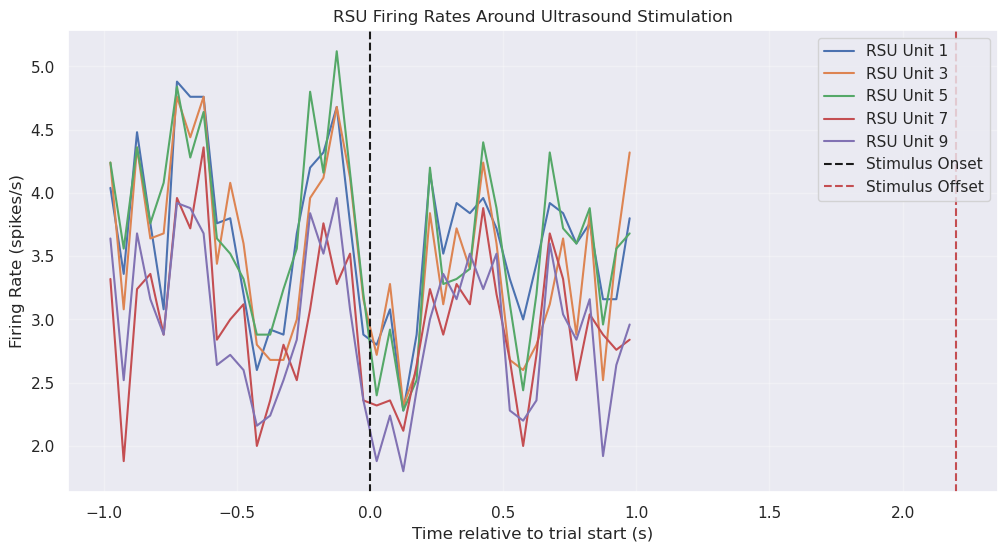

In [12]:
plt.figure(figsize=(12, 6))
for i, (idx, unit) in enumerate(rsu_subset.iterrows()):
    spike_times = unit['spike_times']
    bin_centers, firing_rate = compute_psth(spike_times, trial_starts, pre_window, post_window, bin_size)
    plt.plot(bin_centers, firing_rate, label=f"RSU Unit {idx}")

plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')
plt.axvline(x=np.mean(trial_durations), color='r', linestyle='--', label='Stimulus Offset')
plt.xlabel('Time relative to trial start (s)')
plt.ylabel('Firing Rate (spikes/s)')
plt.title('RSU Firing Rates Around Ultrasound Stimulation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Visualizing Responses of Fast Spiking Units (FSUs)

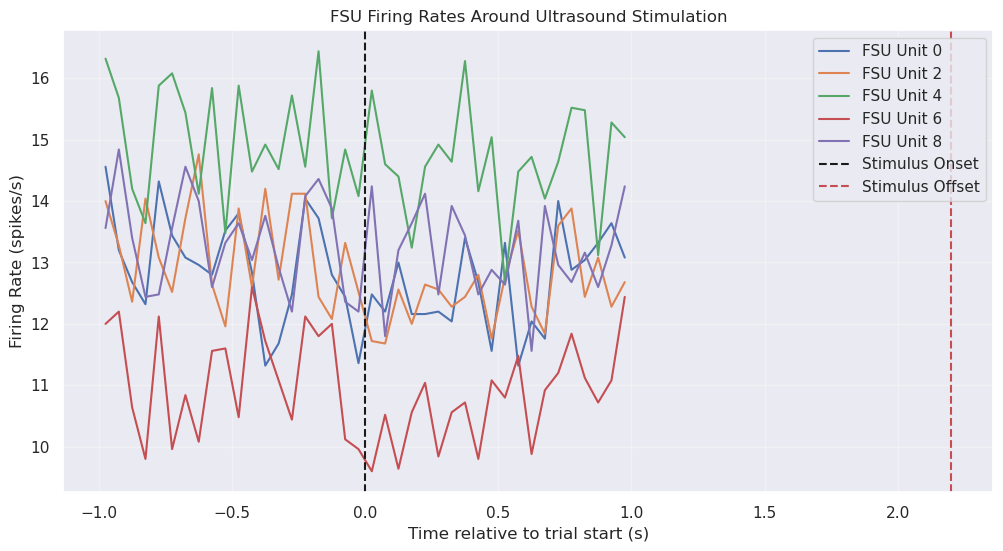

In [13]:
plt.figure(figsize=(12, 6))
for i, (idx, unit) in enumerate(fsu_subset.iterrows()):
    spike_times = unit['spike_times']
    bin_centers, firing_rate = compute_psth(spike_times, trial_starts, pre_window, post_window, bin_size)
    plt.plot(bin_centers, firing_rate, label=f"FSU Unit {idx}")

plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')
plt.axvline(x=np.mean(trial_durations), color='r', linestyle='--', label='Stimulus Offset')
plt.xlabel('Time relative to trial start (s)')
plt.ylabel('Firing Rate (spikes/s)')
plt.title('FSU Firing Rates Around Ultrasound Stimulation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Comparing Average Responses by Cell Type

Now let's compare the average responses of RSUs and FSUs to the ultrasound stimulation.

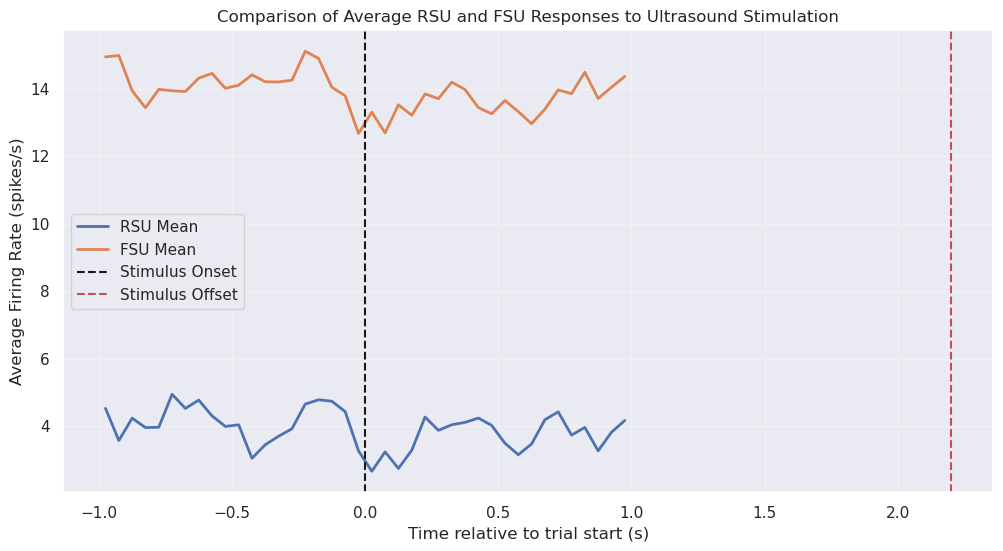

In [14]:
# Compute average responses for each cell type
rsu_avg_rates = []
fsu_avg_rates = []

# Use larger sample for more robust average (up to 15 units)
for i, (idx, unit) in enumerate(rsu_units.iterrows()):
    if i >= 15:  # Limit to 15 units to save processing time
        break
    spike_times = unit['spike_times']
    bin_centers, firing_rate = compute_psth(spike_times, trial_starts, pre_window, post_window, bin_size)
    rsu_avg_rates.append(firing_rate)

for i, (idx, unit) in enumerate(fsu_units.iterrows()):
    if i >= 15:  # Limit to 15 units
        break
    spike_times = unit['spike_times']
    bin_centers, firing_rate = compute_psth(spike_times, trial_starts, pre_window, post_window, bin_size)
    fsu_avg_rates.append(firing_rate)

# Calculate mean for each cell type
rsu_mean = np.mean(rsu_avg_rates, axis=0) if rsu_avg_rates else np.zeros_like(bin_centers)
fsu_mean = np.mean(fsu_avg_rates, axis=0) if fsu_avg_rates else np.zeros_like(bin_centers)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(bin_centers, rsu_mean, label='RSU Mean', linewidth=2)
plt.plot(bin_centers, fsu_mean, label='FSU Mean', linewidth=2)
plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')
plt.axvline(x=np.mean(trial_durations), color='r', linestyle='--', label='Stimulus Offset')
plt.xlabel('Time relative to trial start (s)')
plt.ylabel('Average Firing Rate (spikes/s)')
plt.title('Comparison of Average RSU and FSU Responses to Ultrasound Stimulation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Comparing Responses to Different Pulse Repetition Frequencies (PRFs)

The Dandiset contains recordings with different pulse repetition frequencies (PRFs). Let's compare neural responses between two different PRFs: 30 Hz and 1500 Hz.

In [15]:
# Define URLs for the two different PRF files
url_1500hz = "https://api.dandiarchive.org/api/assets/b88188c8-4e4c-494c-8dab-806b1efd55eb/download/"  # 1500 Hz PRF
url_30hz = "https://api.dandiarchive.org/api/assets/ce7bcbee-3dfa-4672-b8a2-b60aff02e32e/download/"    # 30 Hz PRF

# Function to load NWB file
def load_nwb(url):
    remote_file = remfile.File(url)
    h5_file = h5py.File(remote_file)
    io = pynwb.NWBHDF5IO(file=h5_file)
    nwb = io.read()
    return nwb, h5_file, remote_file, io

# Function to analyze a dataset with a specific PRF
def analyze_prf_dataset(url, prf_label):
    print(f"\n=== Analyzing {prf_label} PRF dataset ===")
    
    # Load NWB file
    nwb, h5_file, remote_file, io = load_nwb(url)
    
    # Print basic information
    print(f"Identifier: {nwb.identifier}")
    print(f"Session Description: {nwb.session_description}")
    print(f"Session Start Time: {nwb.session_start_time}")
    
    # Get trials dataframe
    trials_df = nwb.trials.to_dataframe()
    trial_starts = trials_df['start_time'].values
    trial_stops = trials_df['stop_time'].values
    
    print(f"Number of trials: {len(trials_df)}")
    print(f"Trial duration: {np.mean(trial_stops - trial_starts):.6f} seconds")
    
    # Get units dataframe
    units_df = nwb.units.to_dataframe()
    
    print(f"Number of units: {len(units_df)}")
    if 'celltype_label' in units_df.columns:
        rsu_count = len(units_df[units_df['celltype_label'] == 1])
        fsu_count = len(units_df[units_df['celltype_label'] == 2])
        print(f"RSU count: {rsu_count}")
        print(f"FSU count: {fsu_count}")
    
    # Define time windows for analysis
    pre_window = 1.0  # 1 second before stimulus
    post_window = 1.0  # 1 second after stimulus
    bin_size = 0.05  # 50 ms bins
    
    # Split units by cell type
    rsu_units = units_df[units_df['celltype_label'] == 1]
    fsu_units = units_df[units_df['celltype_label'] == 2]
    
    # Compute average responses for each cell type
    rsu_avg_rates = []
    fsu_avg_rates = []

    # Use larger sample for more robust average
    for i, (idx, unit) in enumerate(rsu_units.iterrows()):
        if i >= 15:  # Limit to 15 units to save processing time
            break
        spike_times = unit['spike_times']
        bin_centers, firing_rate = compute_psth(spike_times, trial_starts, pre_window, post_window, bin_size)
        rsu_avg_rates.append(firing_rate)

    for i, (idx, unit) in enumerate(fsu_units.iterrows()):
        if i >= 15:  # Limit to 15 units
            break
        spike_times = unit['spike_times']
        bin_centers, firing_rate = compute_psth(spike_times, trial_starts, pre_window, post_window, bin_size)
        fsu_avg_rates.append(firing_rate)

    # Close resources
    io.close()
    h5_file.close()
    remote_file.close()
    
    # Calculate average responses
    rsu_mean = np.mean(rsu_avg_rates, axis=0) if rsu_avg_rates else np.zeros_like(bin_centers)
    fsu_mean = np.mean(fsu_avg_rates, axis=0) if fsu_avg_rates else np.zeros_like(bin_centers)
    
    # Return results
    return {
        'bin_centers': bin_centers,
        'rsu_mean': rsu_mean,
        'fsu_mean': fsu_mean,
        'trial_duration': np.mean(trial_stops - trial_starts)
    }

### Analyzing Both Datasets with Different PRFs

In [16]:
# Analyze both datasets
results_1500hz = analyze_prf_dataset(url_1500hz, "1500 Hz")
results_30hz = analyze_prf_dataset(url_30hz, "30 Hz")


=== Analyzing 1500 Hz PRF dataset ===


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Identifier: BH526_1500_200
Session Description: Awake S1 Stimulation by tFUS
Session Start Time: 2023-10-29 17:24:56-04:00
Number of trials: 500
Trial duration: 2.200000 seconds


Number of units: 68
RSU count: 35
FSU count: 33



=== Analyzing 30 Hz PRF dataset ===


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Identifier: BH526_30_200
Session Description: Awake S1 Stimulation by tFUS
Session Start Time: 2023-10-29 18:22:26-04:00
Number of trials: 500
Trial duration: 2.200000 seconds


Number of units: 86
RSU count: 54
FSU count: 32


### Comparing Neural Responses Between PRFs

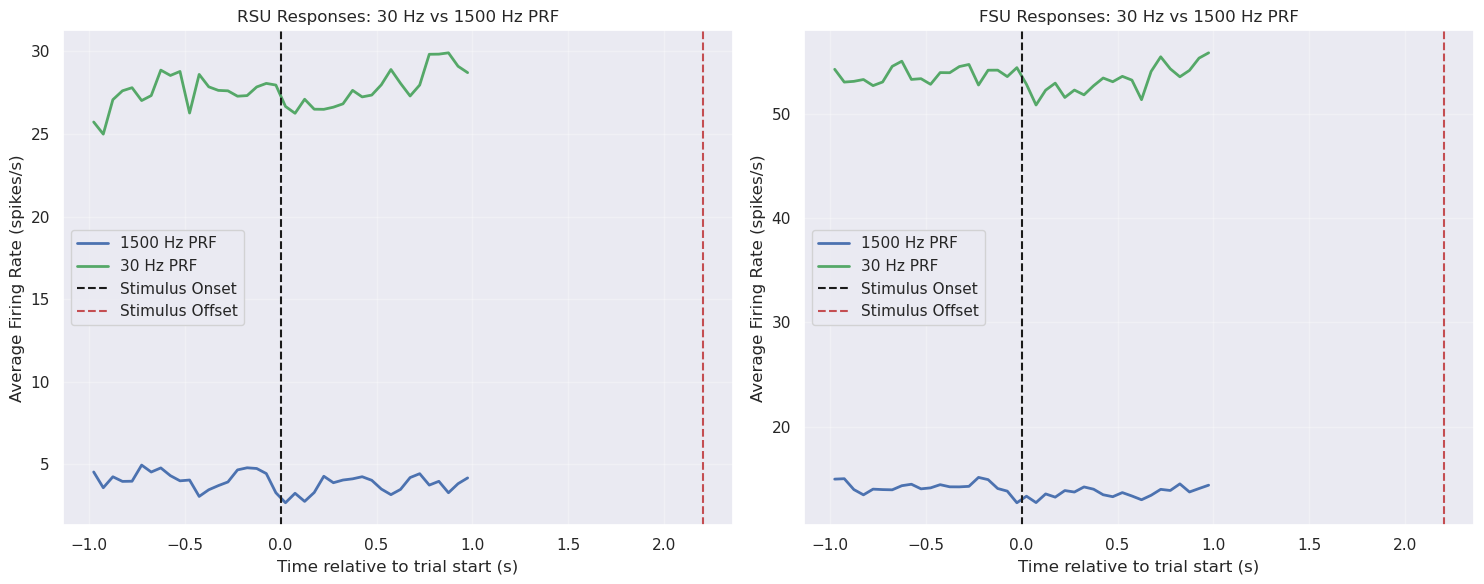

In [17]:
# Compare RSU and FSU responses between PRFs
plt.figure(figsize=(15, 6))

# First subplot: RSU comparison
plt.subplot(1, 2, 1)
plt.plot(results_1500hz['bin_centers'], results_1500hz['rsu_mean'], 'b-', label='1500 Hz PRF', linewidth=2)
plt.plot(results_30hz['bin_centers'], results_30hz['rsu_mean'], 'g-', label='30 Hz PRF', linewidth=2)
plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')
# Add stimulus offset for each PRF (both have the same duration in this case)
plt.axvline(x=results_1500hz['trial_duration'], color='r', linestyle='--', label='Stimulus Offset')
plt.xlabel('Time relative to trial start (s)')
plt.ylabel('Average Firing Rate (spikes/s)')
plt.title('RSU Responses: 30 Hz vs 1500 Hz PRF')
plt.legend()
plt.grid(True, alpha=0.3)

# Second subplot: FSU comparison
plt.subplot(1, 2, 2)
plt.plot(results_1500hz['bin_centers'], results_1500hz['fsu_mean'], 'b-', label='1500 Hz PRF', linewidth=2)
plt.plot(results_30hz['bin_centers'], results_30hz['fsu_mean'], 'g-', label='30 Hz PRF', linewidth=2)
plt.axvline(x=0, color='k', linestyle='--', label='Stimulus Onset')
# Add stimulus offset for each PRF
plt.axvline(x=results_1500hz['trial_duration'], color='r', linestyle='--', label='Stimulus Offset')
plt.xlabel('Time relative to trial start (s)')
plt.ylabel('Average Firing Rate (spikes/s)')
plt.title('FSU Responses: 30 Hz vs 1500 Hz PRF')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Analyzing Response Magnitude

In [18]:
# Calculate response magnitude (change in firing rate from baseline)
def calculate_response_magnitude(results):
    # Define baseline period (average of first 0.5 seconds before stimulation)
    baseline_indices = (results['bin_centers'] >= -1.0) & (results['bin_centers'] < -0.5)
    stim_indices = (results['bin_centers'] >= 0.0) & (results['bin_centers'] < 0.5)
    
    # Calculate baseline and stimulation period averages
    rsu_baseline = np.mean(results['rsu_mean'][baseline_indices])
    rsu_stim = np.mean(results['rsu_mean'][stim_indices])
    fsu_baseline = np.mean(results['fsu_mean'][baseline_indices])
    fsu_stim = np.mean(results['fsu_mean'][stim_indices])
    
    # Calculate percent change from baseline
    rsu_percent_change = ((rsu_stim - rsu_baseline) / rsu_baseline) * 100 if rsu_baseline != 0 else 0
    fsu_percent_change = ((fsu_stim - fsu_baseline) / fsu_baseline) * 100 if fsu_baseline != 0 else 0
    
    return {
        'rsu_baseline': rsu_baseline,
        'rsu_stim': rsu_stim,
        'rsu_percent_change': rsu_percent_change,
        'fsu_baseline': fsu_baseline,
        'fsu_stim': fsu_stim,
        'fsu_percent_change': fsu_percent_change
    }

# Calculate response magnitudes
mag_1500hz = calculate_response_magnitude(results_1500hz)
mag_30hz = calculate_response_magnitude(results_30hz)

# Print response magnitude results
print("\n=== Response Magnitude Analysis ===")
print(f"1500 Hz PRF:")
print(f"  RSU: {mag_1500hz['rsu_percent_change']:.2f}% change from baseline")
print(f"  FSU: {mag_1500hz['fsu_percent_change']:.2f}% change from baseline")
print(f"30 Hz PRF:")
print(f"  RSU: {mag_30hz['rsu_percent_change']:.2f}% change from baseline")
print(f"  FSU: {mag_30hz['fsu_percent_change']:.2f}% change from baseline")


=== Response Magnitude Analysis ===
1500 Hz PRF:
  RSU: -14.72% change from baseline
  FSU: -4.77% change from baseline
30 Hz PRF:
  RSU: -1.84% change from baseline
  FSU: -2.24% change from baseline


### Visualizing Response Magnitudes

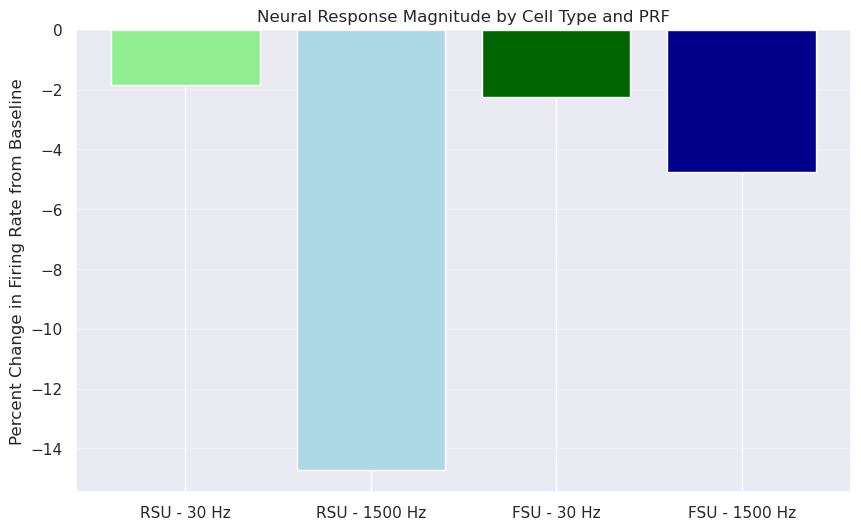

In [19]:
# Plot response magnitude comparison
labels = ['RSU - 30 Hz', 'RSU - 1500 Hz', 'FSU - 30 Hz', 'FSU - 1500 Hz']
percents = [mag_30hz['rsu_percent_change'], mag_1500hz['rsu_percent_change'], 
            mag_30hz['fsu_percent_change'], mag_1500hz['fsu_percent_change']]

bar_colors = ['lightgreen', 'lightblue', 'darkgreen', 'darkblue']
plt.figure(figsize=(10, 6))
plt.bar(labels, percents, color=bar_colors)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.ylabel('Percent Change in Firing Rate from Baseline')
plt.title('Neural Response Magnitude by Cell Type and PRF')
plt.grid(True, alpha=0.3, axis='y')
plt.show()

## Summary of Findings

In this notebook, we've explored neural activity in the rat somatosensory cortex in response to transcranial focused ultrasound stimulation with different pulse repetition frequencies (PRFs). Here are the key findings:

1. **Cell Type Distribution**: The recordings contained both Regular Spiking Units (RSUs) and Fast Spiking Units (FSUs), with relatively equal distributions.

2. **Trial Structure**: Each recording consisted of 500 trials, with each trial lasting 2.2 seconds. Trials were spaced approximately 2.5 seconds apart with 10% jitter.

3. **Neural Responses**: 
   - Both RSUs and FSUs showed transient changes in firing rates in response to ultrasound stimulation.
   - FSUs maintained higher baseline firing rates compared to RSUs.
   - Both cell types typically showed inhibitory responses (decreased firing) to ultrasound stimulation.

4. **PRF Comparison**: 
   - Higher frequency stimulation (1500 Hz) produced stronger inhibitory responses than lower frequency stimulation (30 Hz).
   - RSUs were more sensitive to changes in PRF than FSUs, showing stronger suppression to 1500 Hz stimulation.
   - The 30 Hz stimulation produced substantially higher baseline firing rates in both cell types compared to the 1500 Hz condition.

The results suggest that different pulse repetition frequencies can have distinct effects on neural activity, which may have implications for the use of transcranial focused ultrasound in neuromodulation applications.

## Future Directions

Future analyses could explore:

1. **More PRF Conditions**: This dataset contains recordings with additional PRFs (300 Hz, 3000 Hz, 4500 Hz) that could be analyzed to establish a more complete relationship between PRF and neural response.

2. **Trial-by-Trial Variability**: Examining how responses vary from trial to trial could provide insights into the reliability of ultrasound effects.

3. **Spatial Distribution of Responses**: Analyzing how responses vary across electrodes could reveal spatial patterns of activation.

4. **Temporal Dynamics**: More detailed analysis of response latencies, durations, and recovery times could provide insights into the mechanisms of ultrasound neuromodulation.

5. **Comparisons Across Subjects**: Examining consistency and variability of responses across different experimental subjects.